In [1]:
from basepolygon_class import GoalPolygon
from shapely.geometry import Polygon, LineString
place_one = GoalPolygon('Жилой комплекс «Одинцово-1»')
v = place_one.polygon

/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pa

[[(390063.2196106291, 6170362.6517576445), (389958.9277833924, 6170304.788201299)], [(390063.2196106291, 6170362.6517576445), (390047.4166512929, 6170362.381928427), (390039.10830150265, 6170367.078445088), (390036.08654232713, 6170374.280562167), (390038.5489956103, 6170380.843412237), (390049.8866740905, 6170391.970341136)], [(390049.8866740905, 6170391.970341136), (390047.21911857836, 6170399.742508458)], [(390049.8866740905, 6170391.970341136), (390052.9206991358, 6170387.751918985)], [(390049.8866740905, 6170391.970341136), (390101.40378921997, 6170421.224882164), (390140.70749068074, 6170444.073550819), (390160.1481128677, 6170454.863108251), (390177.8039426309, 6170463.504219642), (390199.3990927144, 6170472.391418217), (390210.0892533465, 6170475.81897157), (390221.88036027143, 6170477.982941293), (390235.1021256404, 6170479.231338554), (390266.50995296007, 6170480.690374487), (390285.1068900102, 6170480.222659134), (390300.98111191235, 6170476.338451784), (390309.93547771533, 

/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))
/opt/anaconda3/envs/tests/lib/python3.10/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


Геометрическое упрощение

In [21]:
def get_xy(s):

    x, y = s.centroid.coords.xy
    return x[0], y[0]

Здесь полигон в нуле не от центра

In [22]:
from shapely.affinity import translate
import numpy as np

s = v.simplify(10, preserve_topology=True)
x, y, _, _ = v.bounds
#x, y = get_xy(s)
st = translate(s, 0-x, 0-y)


In [45]:
coor_list = (list(st.boundary.coords[0:len(st.boundary.coords) - 1]))
coor_list

[(0.0, 679.7554941019043),
 (90.92466560343746, 359.8743795603514),
 (50.64634319592733, 342.689586349763),
 (141.4154383126297, 0.0),
 (738.6390963118174, 170.50443049520254),
 (1041.5171545767225, 487.5379093941301),
 (733.3747470285161, 795.9299552580342),
 (528.746321437764, 592.3512355554849),
 (250.68498866126174, 548.8781394008547),
 (148.7872773281997, 925.0354834403843),
 (84.8542414731346, 907.106489722617),
 (75.55369137861999, 940.1296991426498),
 (9.845574646664318, 921.7006750889122),
 (72.29789360892028, 700.0236357413232)]

разбиение точек на группы по сегментам

In [24]:
from itertools import islice, cycle

def vec_search(point_list, key):
    cr = []
    n = list(islice(cycle(range(len(point_list))), 0, len(point_list) *2))
    for i in range(len(point_list)):
        v_one = [point_list[n[i]][0] - point_list[n[i + 1]][0], point_list[n[i]][1] - point_list[n[i + 1]][1], 0]
        v_two = [point_list[n[i + 1]][0] - point_list[n[i + 2]][0], point_list[n[i + 1]][1] - point_list[n[i + 2]][1],0]
        v_o_norm, v_t_norm = v_one / np.linalg.norm(v_one), v_two / np.linalg.norm(v_two)
        if np.cross(v_o_norm, v_t_norm)[2] < key:
            cr.append(n[i + 1])
        else:
            pass
    cross = [*cr, cr[0] + cr[-1] + 1]
    double_points = [*range(len(point_list)), *range(len(point_list))]
    points = [*point_list, *point_list]
    segments = [double_points[cross[c]:cross[c + 1]+1] for c in range(len(cross) - 1)]
    lines = [LineString(points[cross[c]:cross[c + 1]+1]) for c in range(len(cross) - 1)]
    return segments, lines

In [25]:
bb, ll = vec_search(coor_list, 0.7)

In [26]:
def chains_base (point_list, parts):
    vectors =[]
    for i in parts:
        temp =[]
        for l in range(len(i)-1):
            vec = [point_list[i[l]][0] - point_list[i[l+1]][0], point_list[i[l]][1] - point_list[i[l+1]][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors

In [27]:
res_vec = chains_base(coor_list, bb)

SVD

In [28]:
from scipy.linalg import svd
import numpy as np
import torch

A = np.asarray(res_vec)

/var/folders/l7/52t7xngd2973k8x9_y55rmyh0000gn/T/ipykernel_26749/2655982256.py:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  A = np.asarray(res_vec)


In [29]:
class SvdItem:
    keys=["A", "U", "S", "Vh", "Sigma"]
    def __init__(self, m, collection=None, **kwargs):
        self.A = torch.tensor(m)
        self.collection=collection
        self.U = None
        self.S = None
        self.Vh = None
        self.Sigma = None
        self.svd(**kwargs)
        if collection is not None:
            self.id = f'{collection.id}:{len(collection.matrices)}'
            print(f'set item id: {self.id}')
            collection.A.append(self.A)



    def svd(self, **kwargs):
        U, S, Vh = torch.linalg.svd(self.A, **kwargs)
        Sigma = torch.diag(S)
        self.U, self.S, self.Vh, self.Sigma=U, S, Vh, Sigma
        print(self.U, self.S, self.Vh, self.Sigma)
        if self.collection:
            for v, k in zip([A, U, S, Vh, Sigma], self.__class__.keys):
                (self.collection.__dict__[k]).append(v)

        return U, S, Vh, Sigma
    def pack(self):
        self.collection.__dict__[self.__class__.__name__][self.collection.id]|={self.id:self}
        return self.id, self



class SvdPack:
    def __init__(self):
        self._matrices = []
        self.id = f'{0}:{0}'
        self.A, self.U, self.S, self.Vh, self.Sigma = [], [], [], [], []
        self.tree= {self.id:{}}



    @property
    def matrices(self):
        return self._matrices
    @matrices.setter
    def matrices(self, val, **kwargs):
        if len(val.shape) == 2:
            self._matrices.append(SvdItem(val, collection=self, **kwargs))
        else:
            for v in val:
                self._matrices.append(SvdItem(v, collection=self, **kwargs))

In [30]:
pck = SvdPack()

In [31]:
a_=np.asarray(res_vec, dtype=object)
pck.matrices = a_

tensor([[-0.0699, -0.0142,  0.9975],
        [-0.0167, -0.9997, -0.0154],
        [ 0.9974, -0.0177,  0.0696]]) tensor([622.6624, 354.4463]) tensor([[-0.9588, -0.2842],
        [ 0.2842, -0.9588]]) tensor([[622.6624,   0.0000],
        [  0.0000, 354.4463]])
set item id: 0:0:0
tensor([[-0.8348,  0.0270,  0.5499],
        [-0.0416, -0.9990, -0.0140],
        [ 0.5490, -0.0346,  0.8351]]) tensor([525.0457, 435.8289]) tensor([[ 0.6711,  0.7413],
        [-0.7413,  0.6711]]) tensor([[525.0457,   0.0000],
        [  0.0000, 435.8289]])
set item id: 0:0:1
tensor([[-1.]]) tensor([281.4392]) tensor([[-0.9880, -0.1545],
        [-0.1545,  0.9880]]) tensor([[281.4392]])
set item id: 0:0:2
tensor([[-1.0000,  0.0016],
        [ 0.0016,  1.0000]]) tensor([389.7151,  66.3967]) tensor([[-0.2612,  0.9653],
        [ 0.9653,  0.2612]]) tensor([[389.7151,   0.0000],
        [  0.0000,  66.3967]])
set item id: 0:0:3
tensor([[ 1.4734e-01, -9.6023e-05,  9.8909e-01],
        [ 3.7345e-04,  1.0000e+00,  4.14

In [32]:
pck_vh = pck.Vh

Работа с транспортированными точками

In [33]:
def matricies_check(matricies_list):
    matrix_checked = []
    for i in matricies_list:
        if i[0][1]<0 and i[1][0]>0 or i[0][1]>0 and i[1][0]<0 :
            matrix_checked.append(i)
        else:
            #ii = np.fliplr(i)*(-1)
            i[1]*= -1
            matrix_checked.append(i)
    return matrix_checked

identical_matricies = matricies_check(pck_vh)
identical_matricies

[tensor([[-0.9588, -0.2842],
         [ 0.2842, -0.9588]]),
 tensor([[ 0.6711,  0.7413],
         [-0.7413,  0.6711]]),
 tensor([[-0.9880, -0.1545],
         [ 0.1545, -0.9880]]),
 tensor([[-0.2612,  0.9653],
         [-0.9653, -0.2612]]),
 tensor([[ 0.2713, -0.9625],
         [ 0.9625,  0.2713]]),
 tensor([[-0.2736,  0.9618],
         [-0.9618, -0.2736]])]

In [34]:
def transform_chains_from_vh(chains, t):
    chains_t=[]
    for i, clust in enumerate(chains):
        _t=[]
        for j in clust:
            _ = t[i] @ np.asarray(coor_list[j])
            _t.append(np.asarray(_).tolist())
        chains_t.append(_t)
    return chains_t

p_t = transform_chains_from_vh(bb, identical_matricies)

In [35]:
def chains_ (point_list):
    vectors =[]
    for i in point_list:
        temp =[]
        for l in range(len(i)-1):
            vec = [i[l][0] - i[l+1][0], i[l][1] - i[l+1][1]]
            temp.append(vec)
        vectors.append(temp)
    return vectors

v_t = chains_(p_t)
# not transformed vec
v_ = res_vec



In [36]:
def unit_vector(vector):
    return vector / np.linalg.norm(vector)

def angle_between(v1, v2):
    v1_u = unit_vector(v1)
    v2_u = unit_vector(v2)
    return np.arccos(np.clip(np.dot(v1_u, v2_u), -1.0, 1.0))

def angle (v_tr, v_b):
    ang =[]
    for j, i in enumerate(v_tr):
        for ind, val in enumerate(i):
            ang.append(angle_between(val, v_b[j][ind]))
            break
    return ang

angl = angle(v_t, res_vec)

In [37]:

scope = np.asarray(angl)/np.linalg.norm(angl)
r = np.round(scope*len(angl),0)
labels=[]
l = np.unique(r).tolist()
for i in r:
    labels.append(l.index(i))
print(labels)


[2, 0, 2, 1, 1, 1]


Display

In [44]:
from collections import defaultdict
from shapely.geometry import MultiLineString
d_ = defaultdict(list)
for la, l in zip(labels, ll):
    d_[la].append(l)



2
0
1


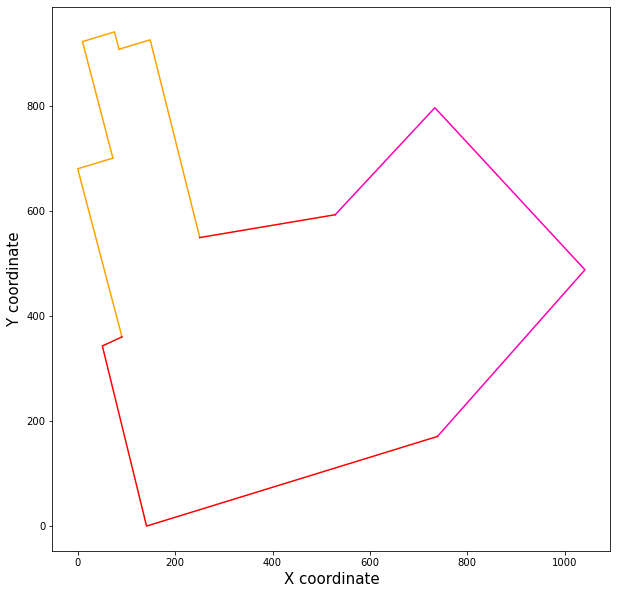

In [39]:
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 10))
ax.set_xlabel('X coordinate', fontsize=15)
ax.set_ylabel('Y coordinate', fontsize=15)
for d in d_[0]:
    ax.plot(*d.xy, label='LineString', color='#ff00b4')
for d in d_[1]:
    ax.plot(*d.xy, label='LineString', color='#ffa200')
for d in d_[2]:
    ax.plot(*d.xy, label='LineString', color='#ff0000')
for d in d_[3]:
    ax.plot(*d.xy, label='LineString', color='#00ff54')
for d in d_[4]:
    ax.plot(*d.xy, label='LineString', color='#0012ff')
for d in d_[5]:
    ax.plot(*d.xy, label='LineString', color='#ffcc00')
for d in d_[6]:
    ax.plot(*d.xy, label='LineString', color='#9c00ff')

plt.show()

Часть с сеткой